# Rainfall-Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv('rainfall.csv')


In [3]:
data.describe()


,Year,Month,High temp,Low temp,Month_Total
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,2003.534845,6.498341,30.698894,21.382923,202.341123
std,5.192881,3.452424,2.884136,4.937484,248.991297
min,1995.000000,1.000000,19.500000,8.200000,0.000000
25%,1999.000000,3.000000,29.300000,17.200000,7.000000
50%,2004.000000,6.000000,31.500000,23.500000,113.000000
75%,2008.000000,9.000000,32.600000,25.600000,315.250000
max,2012.000000,12.000000,39.100000,28.100000,3001.000000


In [4]:
data.head()

,Station,Year,Month,High temp,Low temp,1,2,3,4,5,...,23,24,25,26,27,28,29,30,31,Month_Total
0,Barisal,1995,1,24.9,10.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Barisal,1995,2,27.7,15.0,0,0,0,0,0,...,0,21,6,0,0,7,NaN,NaN,NaN,62
2,Barisal,1995,3,33.0,19.5,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,Barisal,1995,4,34.1,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,12
4,Barisal,1995,5,33.7,26.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,144


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7232 entries, 0 to 7231
Data columns (total 37 columns):
Station        7232 non-null object
Year           7232 non-null int64
Month          7232 non-null int64
High temp      7232 non-null float64
Low temp       7232 non-null float64
1              7232 non-null object
2              7232 non-null object
3              7232 non-null object
4              7232 non-null object
5              7232 non-null object
6              7232 non-null object
7              7232 non-null object
8              7232 non-null object
9              7232 non-null object
10             7232 non-null object
11             7232 non-null object
12             7232 non-null object
13             7232 non-null object
14             7232 non-null object
15             7232 non-null object
16             7232 non-null object
17             7232 non-null object
18             7232 non-null object
19             7232 non-null object
20             7232 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B68014CC0>,
      dtype=object)

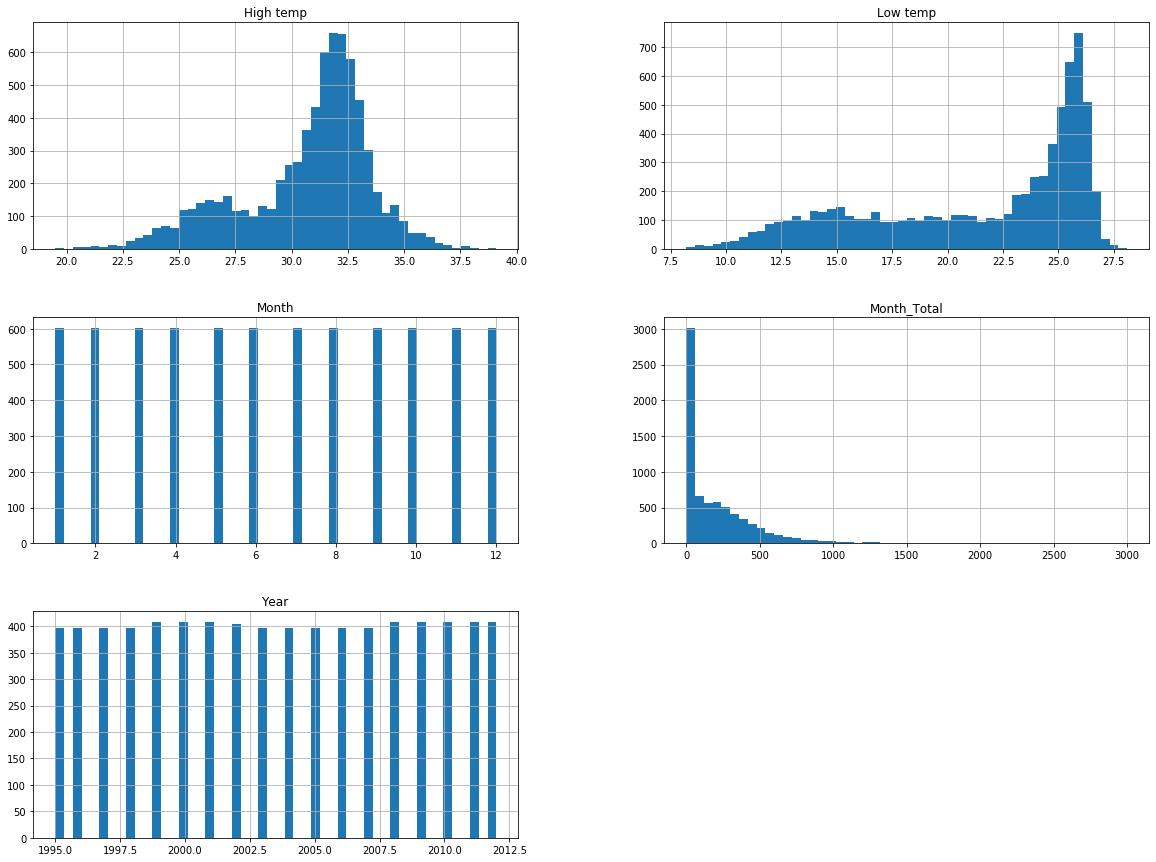

In [6]:
data.hist(bins=50, figsize=(20,15))

In [7]:
X = data.iloc[:,0:5].values

y = data.iloc[:,36].values


In [8]:
#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ...
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 



In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,train_size=0.8,random_state = 42)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [12]:
predicted1 = neigh.predict(X_test)
print("Prediction Result: ",predicted1)

Prediction Result:  [4.200e+00 4.000e-01 4.194e+02 ... 1.524e+02 0.000e+00 2.304e+02]


In [13]:
print('R-squared test score: {:.3f}'.format(neigh.score(X_test,y_test))) #

R-squared test score: 0.719


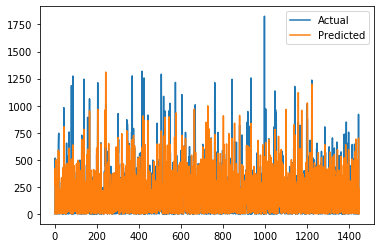

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test,label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()
plt.show()